In [1]:
#@title
# just adding this in so everyone can use my api key to access kaggle
import os
import json
if not os.path.exists('/root/.kaggle'):
  os.mkdir('/root/.kaggle')
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump({"username":"freddylopez845","key":"1ae0450cccb94955d67f82586142d5f5"}, file)
os.system('chmod 600 /root/.kaggle/kaggle.json')

0

In [2]:
import kaggle
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
kaggle.api.dataset_download_file(dataset='gauthamp10/google-playstore-apps', file_name='Google-Playstore.csv')

True

In [4]:
# read csv but remove unnecesary columns
use_columns = ['App Name', 'Category', 'Rating', 'Rating Count', 'Installs', 'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency', 'Size', 'Released', 'Last Updated', 'Content Rating', 'Scraped Time',]
df = pd.read_csv('Google-Playstore.csv.zip', usecols=use_columns)

In [5]:
paid_apps = df[(df['Free'] == False) & (df['Price'] > 0)]
free_apps = df[(df['Free'] == True) | (df['Price'] == 0)]

In [6]:
# cleanup paid_apps_data
paid_apps_stats = paid_apps[['Category', 'Price', 'Maximum Installs']].groupby('Category').describe()

# calculate zscore for price base on category
# using assign to avoid SettingWithCopyWarning
paid_apps = paid_apps.assign(price_zscore = paid_apps.apply(lambda x: (x['Price'] - paid_apps_stats.loc[x['Category']]['Price']['mean']) / paid_apps_stats.loc[x['Category']]['Price']['std'], axis=1))

# drop all rows where zscore is more than 4 standard deviations. We can consider these outliers. We dropped 296 rows.
paid_apps = paid_apps[(paid_apps.loc[:,'price_zscore'].abs() <= 4)]

# Average price by category

In [7]:
average_prices = paid_apps[['Category', 'Price']].groupby('Category').mean().sort_values('Price')

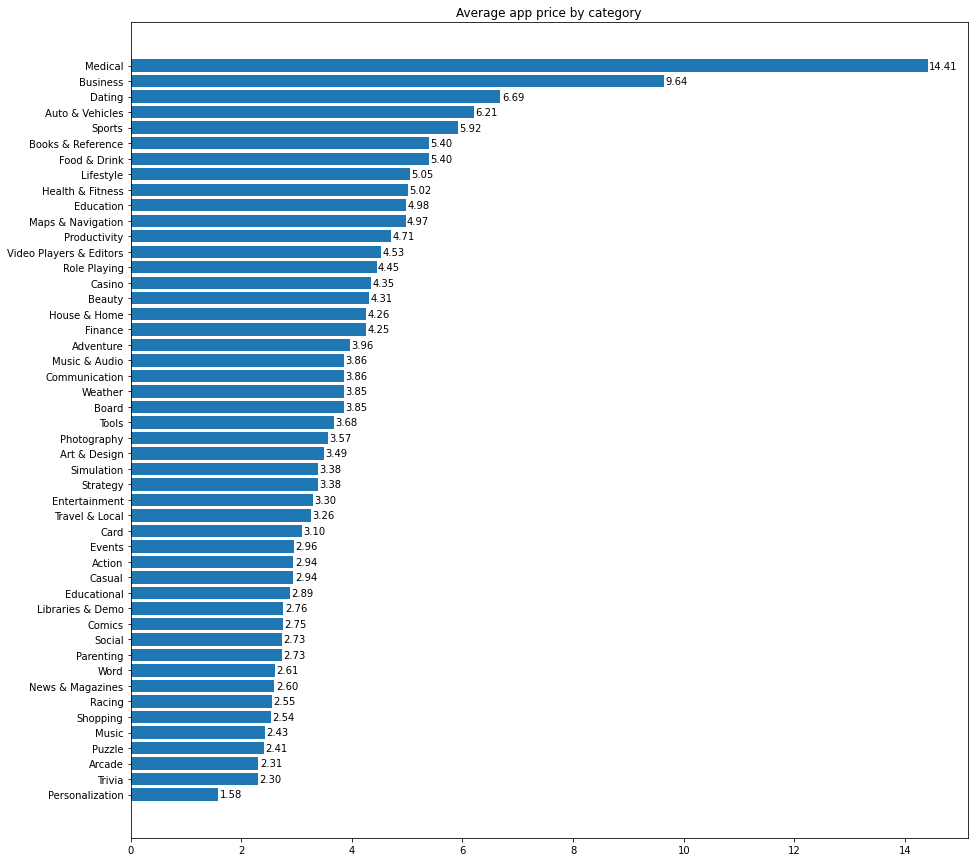

In [8]:
fig1 = plt.figure(figsize=(15,15))
ax1 = fig1.add_subplot(1,1,1)
bars = ax1.barh(average_prices.index, average_prices['Price'])
plt.title('Average app price by category')
for bar in bars:
    yval = bar.get_y()
    plt.text(bar.get_width() + .025, yval + .2, f'{bar.get_width():.2f}')

In [9]:
final_df = free_apps.append(paid_apps)

In [10]:
final_df[['Category', 'Rating']].groupby('Category').describe()

Rating                                             
                            count      mean       std  min  25%  50%  75%  max
Category                                                                      
Action                    26823.0  2.705864  1.941292  0.0  0.0  3.7  4.2  5.0
Adventure                 22772.0  2.814114  1.951538  0.0  0.0  3.8  4.3  5.0
Arcade                    52696.0  2.450803  2.160546  0.0  0.0  3.5  4.5  5.0
Art & Design              18388.0  1.952779  2.055987  0.0  0.0  0.0  4.1  5.0
Auto & Vehicles           17949.0  2.049579  2.025988  0.0  0.0  2.4  4.1  5.0
Beauty                    11699.0  1.434105  1.988714  0.0  0.0  0.0  3.8  5.0
Board                     10442.0  2.782216  1.953941  0.0  0.0  3.8  4.3  5.0
Books & Reference        116468.0  2.467299  2.162948  0.0  0.0  3.7  4.5  5.0
Business                 142144.0  1.439153  1.994503  0.0  0.0  0.0  3.8  5.0
Card                       8043.0  3.085180  1.773929  0.0  2.6  3.9  4.3  5.0
Casino                     5034.0  3.279499  1.723321  0.0  3.3  4.1  4.4  5.0
Casual                    49256.0  2.425209  2.089079  0.0  0.0  3.5  4.3  5.0
Comics                     2821.0  2.864906  1.837456  0.0  0.0  3.7  4.3  5.0
Communication             47540.0  2.122814  2.106829  0.0  0.0  2.5  4.2  5.0
Dating                     6447.0  2.452381  1.933617  0.0  0.0  3.3  4.1  5.0
Education                239737.0  2.247127  2.150303  0.0  0.0  3.0  4.4  5.0
Educational               21056.0  2.437866  2.083712  0.0  0.0  3.6  4.3  5.0
Entertainment            137570.0  2.435426  2.031345  0.0  0.0  3.4  4.3  5.0
Events                    12675.0  1.270809  2.000846  0.0  0.0  0.0  3.5  5.0
Finance                   64720.0  2.403239  2.033669  0.0  0.0  3.3  4.3  5.0
Food & Drink              73442.0  1.294598  1.970117  0.0  0.0  0.0  3.6  5.0
Health & Fitness          82591.0  1.623793  2.037345  0.0  0.0  0.0  4.0  5.0
House & Home              14173.0  1.485381  1.938025  0.0  0.0  0.0  3.6  5.0
Libraries & Demo           5067.0  2.086797  2.106340  0.0  0.0  2.1  4.2  5.0
Lifestyle                117758.0  1.930369  2.116404  0.0  0.0  0.0  4.2  5.0
Maps & Navigation         26346.0  2.224672  2.013649  0.0  0.0  3.0  4.2  5.0
Medical                   31675.0  1.848767  2.083839  0.0  0.0  0.0  4.1  5.0
Music                      4143.0  2.662008  1.879198  0.0  0.0  3.6  4.1  5.0
Music & Audio            154583.0  2.226769  2.183524  0.0  0.0  3.0  4.4  5.0
News & Magazines          42583.0  2.483825  2.100057  0.0  0.0  3.5  4.4  5.0
Parenting                  3764.0  2.423273  2.055030  0.0  0.0  3.4  4.3  5.0
Personalization           89005.0  2.758736  2.065959  0.0  0.0  4.0  4.4  5.0
Photography               35383.0  2.519747  1.943635  0.0  0.0  3.5  4.2  5.0
Productivity              78232.0  1.938078  2.069725  0.0  0.0  0.0  4.1  5.0
Puzzle                    50264.0  2.688477  2.083830  0.0  0.0  3.9  4.4  5.0
Racing                    10178.0  2.960385  1.812330  0.0  0.0  3.8  4.2  5.0
Role Playing               9651.0  3.383732  1.495100  0.0  3.3  3.9  4.3  5.0
Shopping                  74752.0  1.837025  2.134065  0.0  0.0  0.0  4.2  5.0
Simulation                22723.0  3.211028  1.492071  0.0  3.1  3.8  4.1  5.0
Social                    44041.0  2.399030  2.136757  0.0  0.0  3.4  4.4  5.0
Sports                    47036.0  2.315252  2.077298  0.0  0.0  3.3  4.3  5.0
Strategy                   8235.0  2.878482  1.854831  0.0  0.0  3.8  4.3  5.0
Tools                    141948.0  2.346193  2.002298  0.0  0.0  3.2  4.2  5.0
Travel & Local            66653.0  1.921090  2.081297  0.0  0.0  0.0  4.1  5.0
Trivia                    11684.0  2.526078  2.050504  0.0  0.0  3.6  4.3  5.0
Video Players & Editors   13923.0  2.904259  1.741972  0.0  2.0  3.6  4.2  5.0
Weather                    7128.0  3.119851  1.825095  0.0  2.2  4.0  4.4  5.0
Word                       8524.0  2.902417  2.008582  0.0  0.0  4.0  4.5  5.

# Apps by category and number of installs

In [11]:
# there may be a better way of doing this
max_df = pd.DataFrame(columns=['Category', 'App Name', 'Maximum Installs'], index=[])
for i in final_df[['App Name', 'Category', 'Maximum Installs']].groupby('Category').max().iterrows():
    max_row = final_df[(final_df['Category'] == i[0]) & (final_df['Maximum Installs'] == i[1].values[0])][['Category', 'App Name', 'Maximum Installs']]
    max_row['Maximum Installs'] = max_row['Maximum Installs'] / 1000000
    max_df = max_df.append(max_row, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
max_df = max_df.sort_values('Maximum Installs')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65293 missing from current font.
  font.set_text(s, 0, flags=flags)


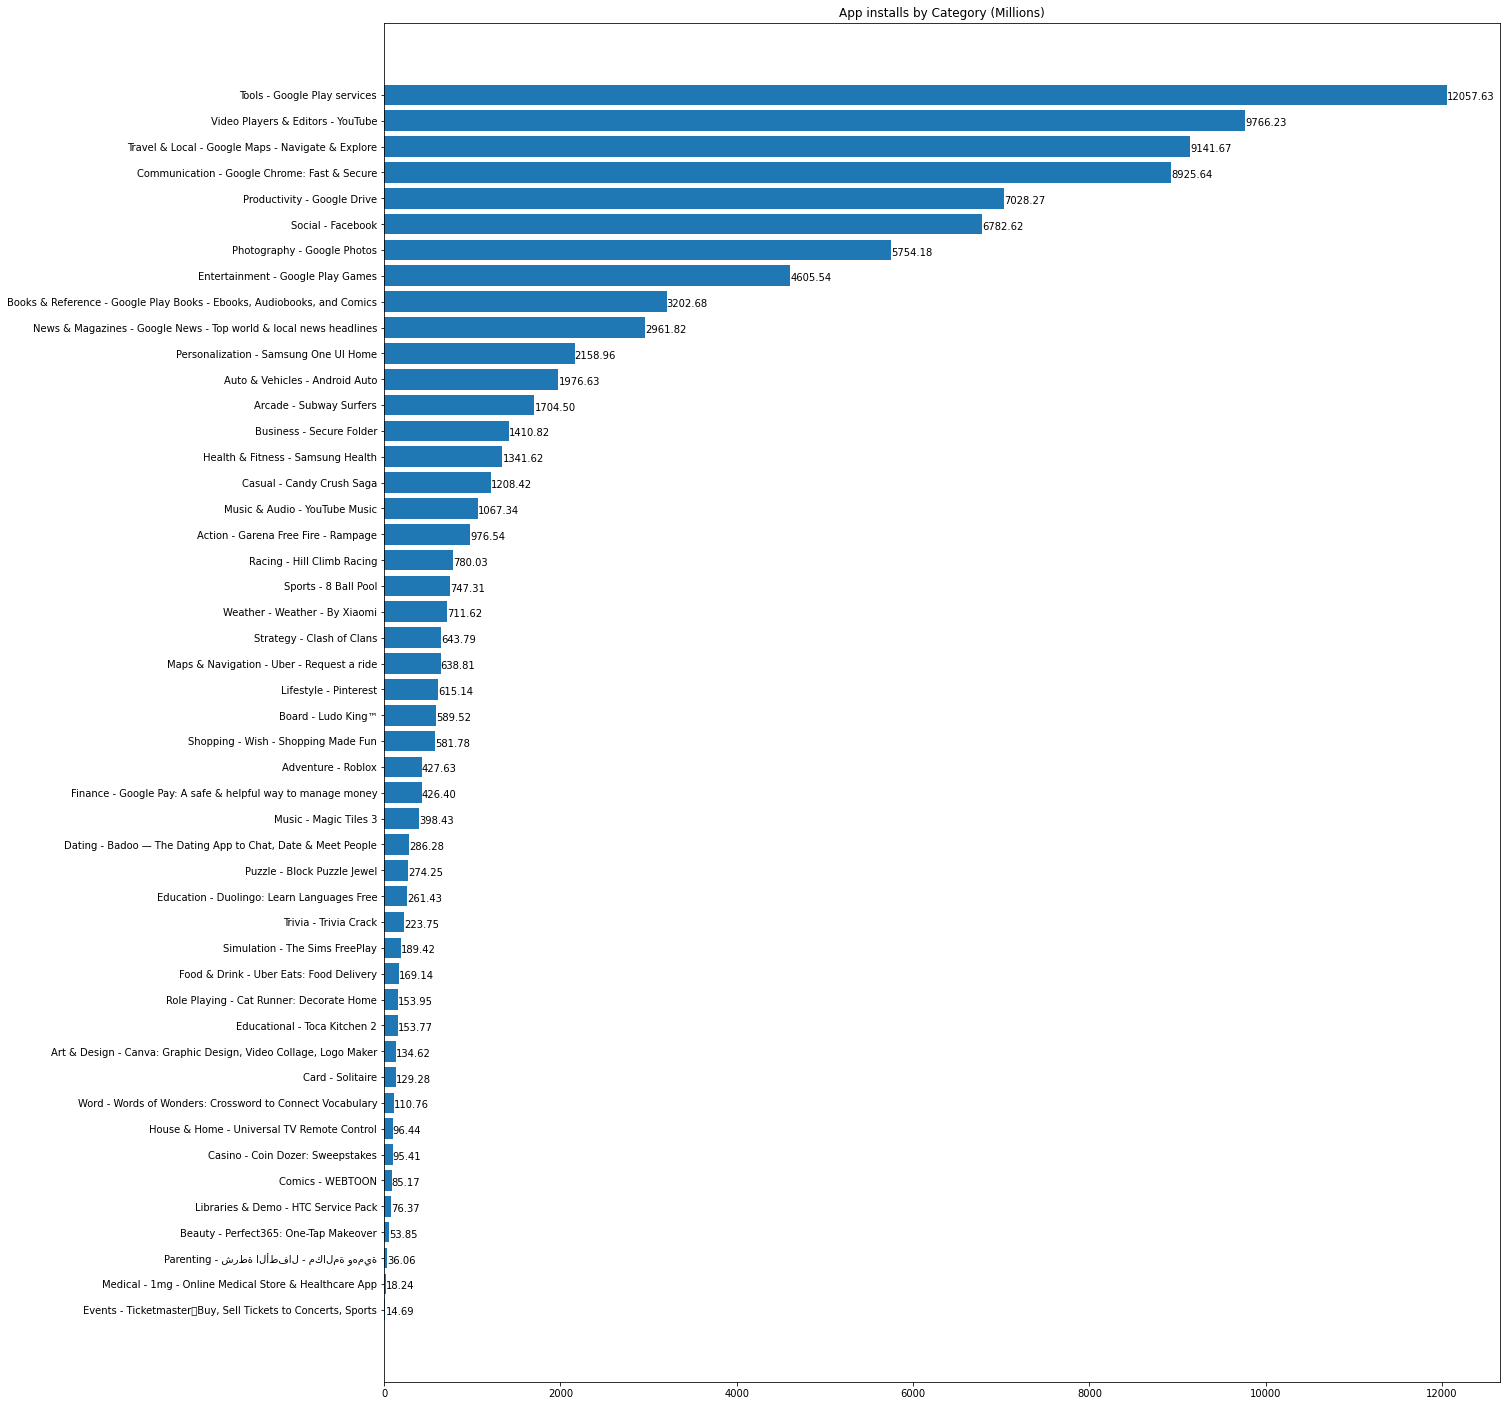

In [13]:
fig1 = plt.figure(figsize=(20,25))
ax1 = fig1.add_subplot(1,1,1)
bars = ax1.barh(list(map(' - '.join, max_df[['Category', 'App Name']].values)), max_df['Maximum Installs'])
plt.title('App installs by Category (Millions)')
for bar in bars:
    yval = bar.get_y()
    plt.text(bar.get_width() + .025, yval + .2, f'{bar.get_width():.2f}')

# Paid app ratings vs free app ratings

In [14]:
ratings_diff = paid_apps[['Category', 'Rating']].groupby('Category').mean() - free_apps[['Category', 'Rating']].groupby('Category').mean()

In [15]:
# positive value indicates paid apps have better average rating
ratings_diff.sort_values('Rating', ascending=False)

,Rating
Category,
Libraries & Demo,0.980463
Strategy,0.826994
Adventure,0.768957
Comics,0.731763
Health & Fitness,0.675203
Productivity,0.657781
Business,0.600905
Photography,0.564362
Board,0.542351


In [16]:
number_of_rows_removed = df.shape[0] - final_df.shape[0]
print(number_of_rows_removed)

296


# Database ingestion

In [21]:
con = sqlite3.connect('apps.db')
cursor = con.cursor()

cursor.execute('''CREATE TABLE apps
               (app_name text, category text, rating real, rating_count real, 
               installs text, min_installs integer, max_installs integer, free integer,
               price real, currency text, size text, released text, last_updated text,
               content_rating text, scraped_time text, price_zscore real
               )''')

In [22]:
# only exporting the first 10k rows. All rows would create a very large database file.
cursor.executemany("insert into apps values (?, ?, ?, ?, ?, ?, ?, ?, ?, ? ,?, ?, ?, ?, ?, ?)", final_df.values[:10000])
cursor.execute('commit;')

In [23]:
cursor.execute('select count(*) from apps;')
cursor.fetchone()

(10000,)

In [24]:
con.close()